## Courtesy of Kaggle: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

## 1. About the the Dataset

 - The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## 2. Features of the Dataset
- The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

## 3. Research Questions
**The aim of our study is to answer the below research questions:**

* Does price vary with Airlines?
* How is the price affected when tickets are bought in just 1 or 2 days before departure?
* Does ticket price change based on the departure time and arrival time?
* How the price changes with change in Source and Destination?
* How does the ticket price vary between Economy and Business class?

**Importing the Libraries**

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from scipy import stats
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

sns.set_style("whitegrid")

In [2]:
# iImporting the dataset
df = pd.read_csv('Clean_Dataset.csv', index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
print(df.info())
print("******************")
print("The shape of the dataset is ", df.shape)
print("******************")
print("Missing Values")
print(df.isnull().sum())
print("******************")
print("There is", df.duplicated().sum(), "duplicate")

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB
None
******************
The shape of the dataset is  (300153, 11)
******************
Missing Values
airline             0
flight              0
source_city         0
departure_time      0
stops              

In [4]:
# checking for their unique values and value count to know my dataset

unique_number=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number,columns=['Unique Number'], index=df.columns)
    

,Unique Number
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476
days_left,49


In [5]:
#to print the column name and count of unique values in each column
for col in list(df.columns):
    print("\nfor column : ", col,"\n")
    print(df[col].value_counts())



for column :  airline 

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

for column :  flight 

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

for column :  source_city 

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

for column :  departure_time 

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

for column :  stops 

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

for column :  arrival_time 

arrival_time
Night            9

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Research Questions

**1. Does price vary with Airlines?**

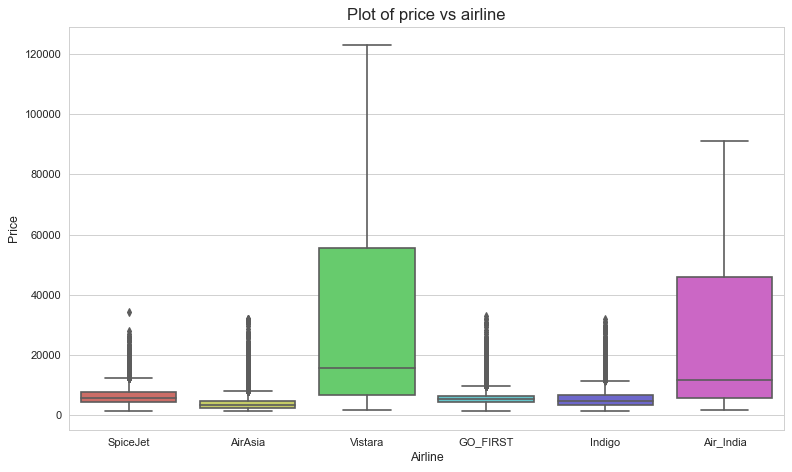

In [7]:
plt.figure(figsize=(10,6),dpi=80)
sns.boxplot(df, x =df.airline, y=df.price,palette='hls')
plt.title('Plot of price vs airline',fontsize=15)
plt.xlabel('Airline',fontsize=11)
plt.ylabel('Price',fontsize=11)
plt.tight_layout()

plt.show()

*yes, we can say price varies with airline, as we can see,Vistara have the highest price range, with  flight price of over 120,000, Air_India comes next, with price range of over 40,000*

**2. How is the price affected when tickets are bought in just 1 or 2 days before departure?**

In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


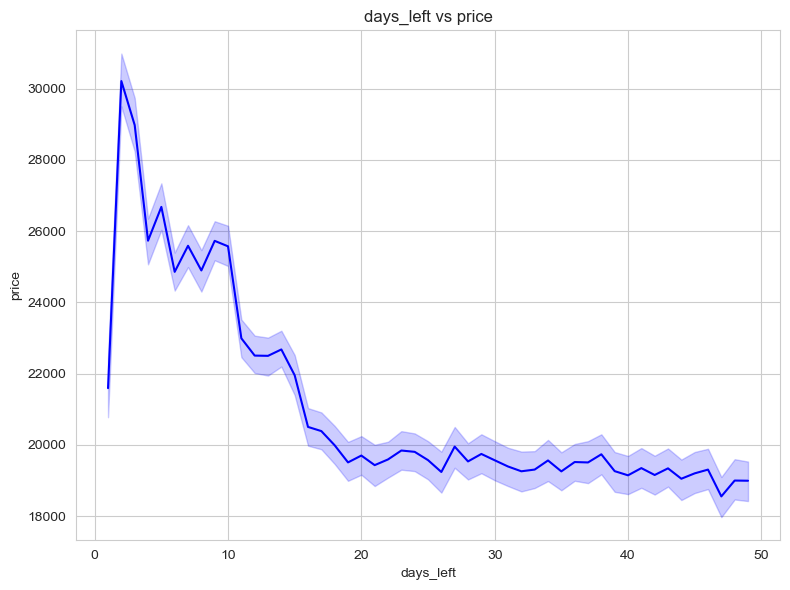

In [9]:
plt.figure(figsize=(8,6))
sns.lineplot(df,x=df.days_left,y=df.price, color='b')
plt.title('days_left vs price')
plt.tight_layout()
plt.show()

*from the lineplot, there was a stable price range from the period of 50 days_left to around 20 days_left, but then as the days_left get closer to the day of the flight, the price goes up. But soemthing strange happens a day left, the price of the ticket dropped drastically to about -10,000 estimate of the asking price before a day left. We can speculate probably, the plane is yet to be filled up.*

**3. Does ticket price change based on the departure time and arrival time?**

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


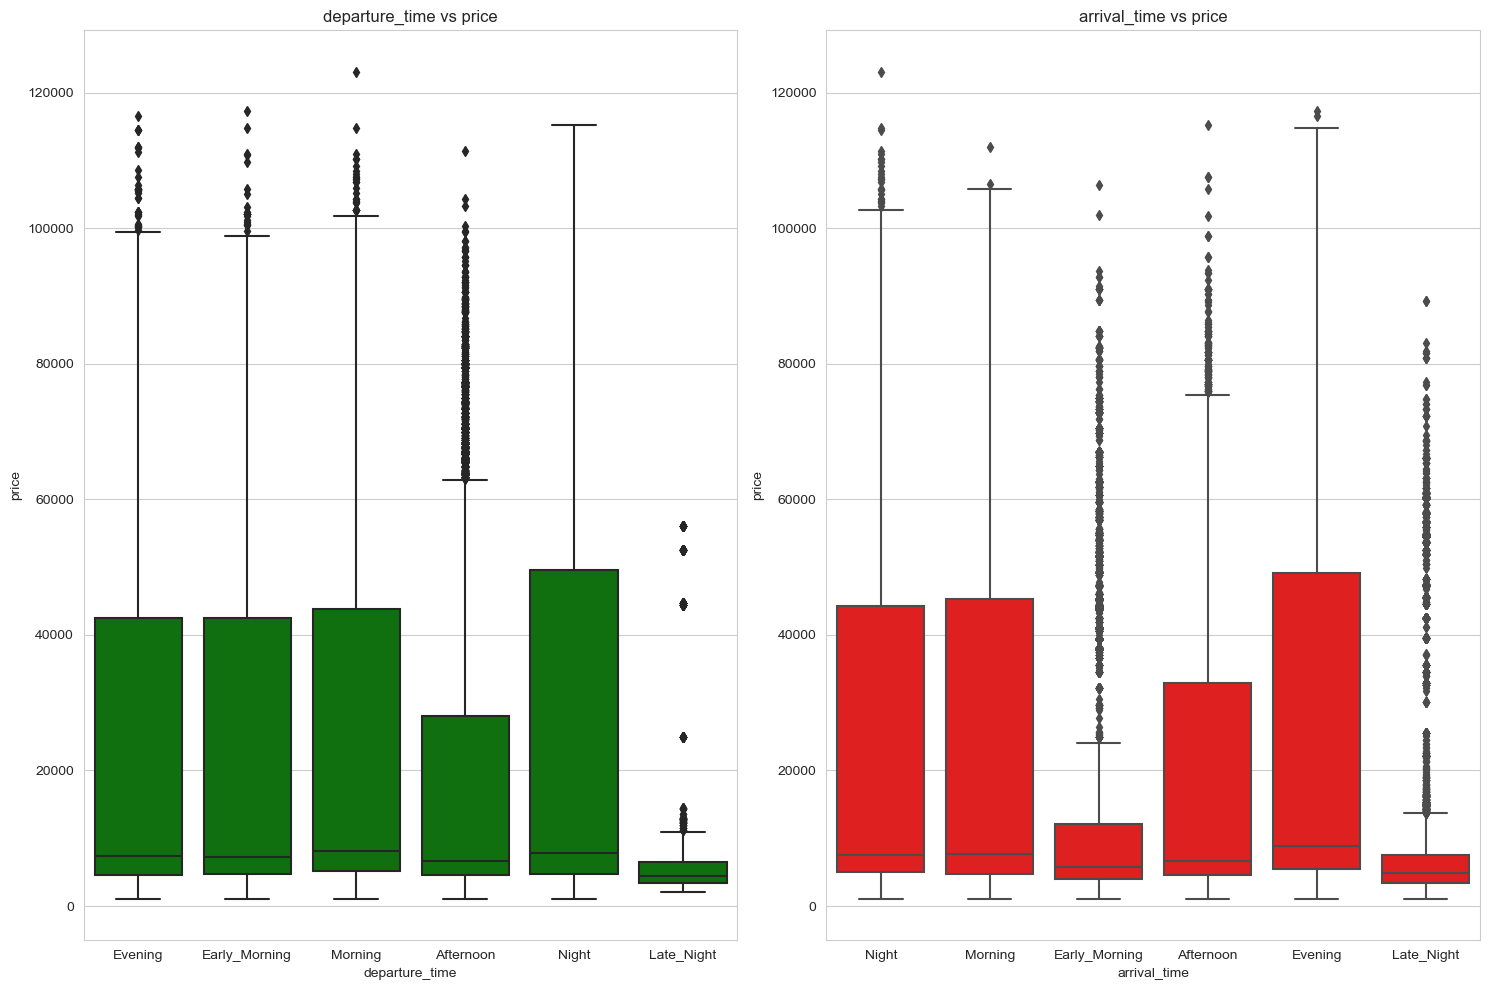

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(df,x=df.departure_time,y=df.price, color='g')
plt.title('departure_time vs price')

plt.subplot(1,2,2)
sns.boxplot(df,x=df.arrival_time,y=df.price, color='r')
plt.title('arrival_time vs price')

plt.tight_layout()
plt.show()


**Departure time VS Price**

- Prices at Night have prices higher
- There is a almost a constant btw evening, early morning and morning, with late night having less price

**Arrival time VS Price**
- Evening price are high compared to night, afternoon and morning.
- Late night still have the cheapest pricee

#### 3. **How the price changes with change in Source and Destination?**

In [12]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


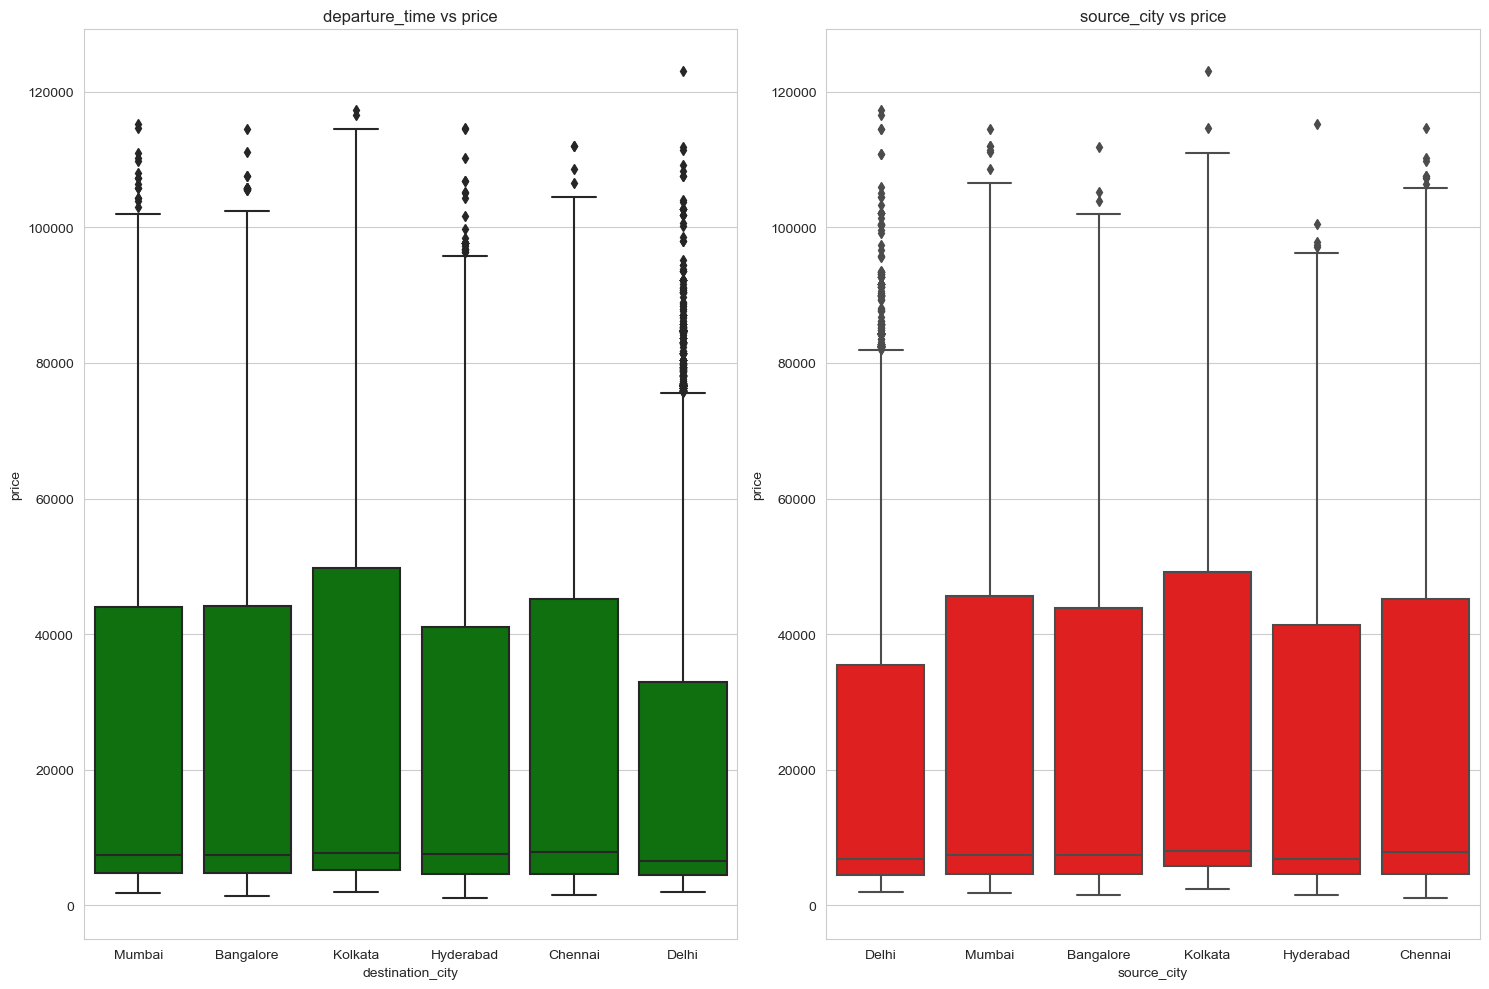

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(df,x=df.destination_city,y=df.price, color='g')
plt.title('departure_time vs price')

plt.subplot(1,2,2)
sns.boxplot(df,x=df.source_city,y=df.price, color='r')
plt.title('source_city vs price')

plt.tight_layout()
plt.show()


- Taking off from **Kolkata**, tend to have a high price, with **Chennai and Mumbai** coming close.
- **Bangalore, Hyderabad** have prices slightly lower than **Chennai**
- **Delhi** have the cheapest price. Since Delhi have more population and bigger airplot, also been the capital, it tends to have flight ticket cheaper.
- We can conclude same thing for the destination city.


### 4. How does the ticket price vary between Economy and Business class?

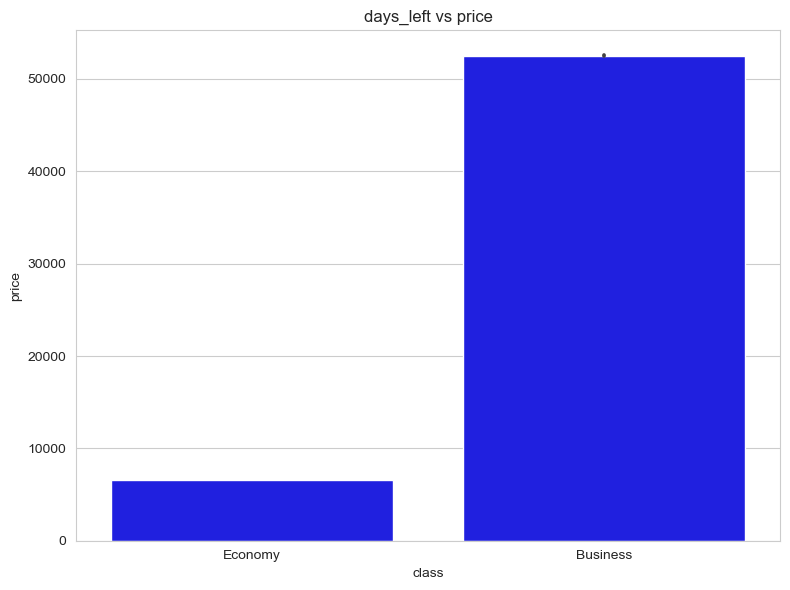

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(df,x=df['class'],y=df['price'], color='b')
plt.title('days_left vs price')
plt.tight_layout()
plt.show()

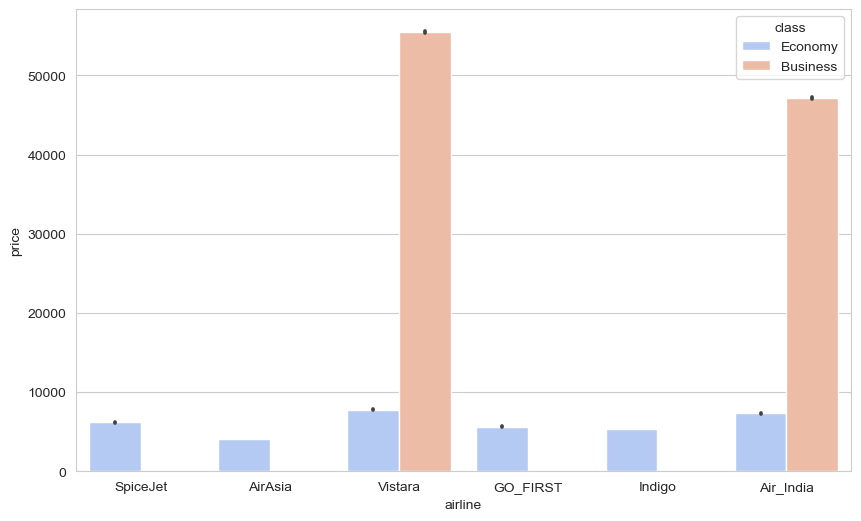

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(df, x='airline', y=df.price, hue='class', palette='coolwarm');

- visulaizing from the airline brand, we can see that **Business class** price are well more higher than the **Economy class**, with **Vistara** and **Air_India** the only flight with both classes. Also, **Vistara** have the highest for both classes.

In [16]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Checking for Outliers

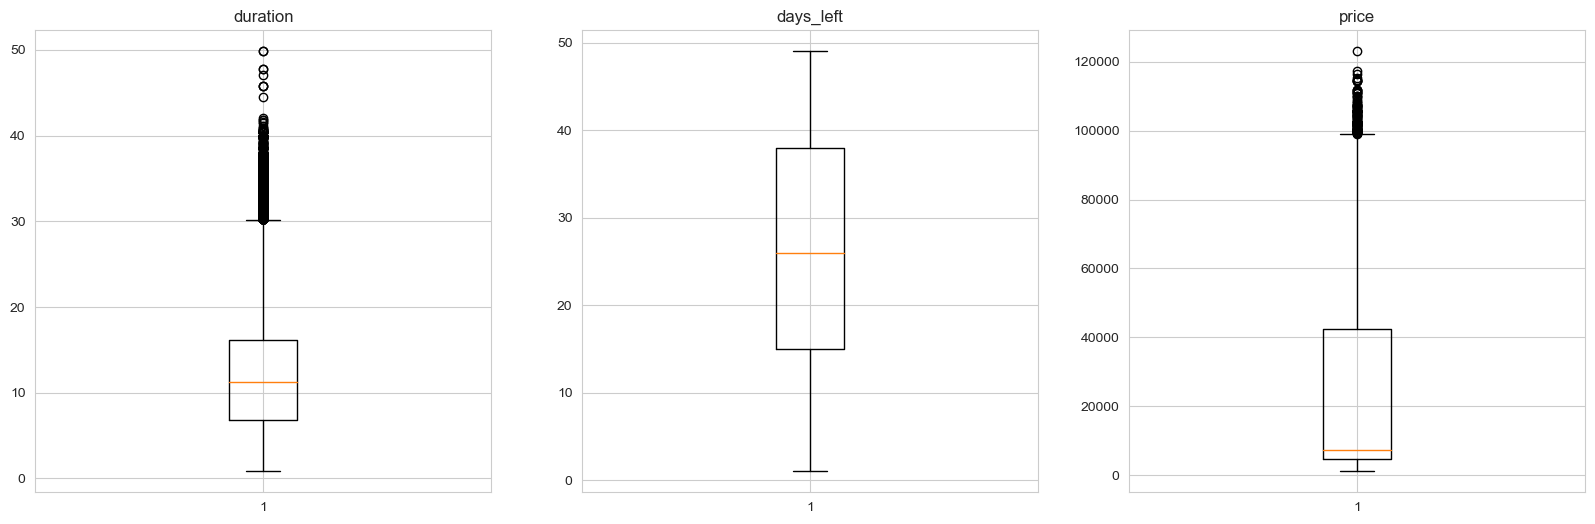

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))


ax1.boxplot(df['duration'])
ax1.set_title('duration')

ax2.boxplot(df['days_left'])
ax2.set_title('days_left')

ax3.boxplot(df['price'])
ax3.set_title('price')
plt.show()

Text(0.5, 1.0, 'price')

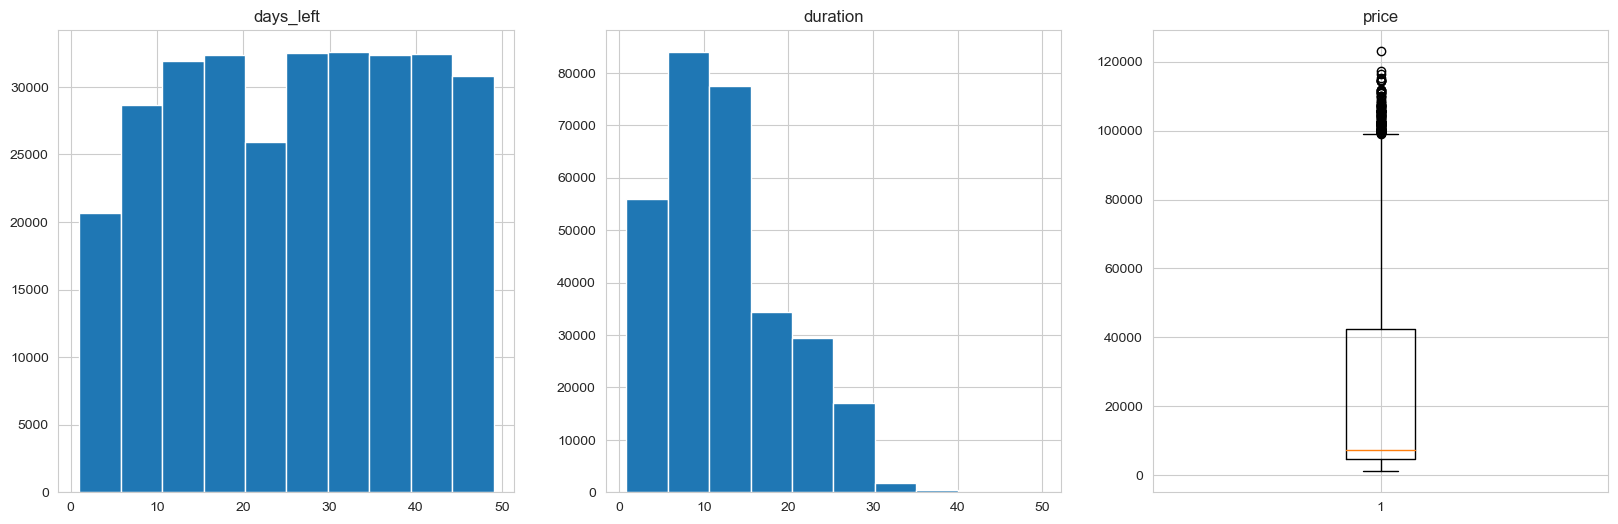

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))
ax1.hist(df['days_left'])
ax1.set_title('days_left')

ax2.hist(df['duration'])
ax2.set_title('duration')

ax3.boxplot(df['price'])
ax3.set_title('price')

In [19]:
duration_zscore= zscore(df['duration'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(duration_zscore>threshold)[0])))
    print('--------------')


Threshold Value: 1
Number of Outliers: 53555
--------------
Threshold Value: 2
Number of Outliers: 9842
--------------
Threshold Value: 3
Number of Outliers: 722
--------------


In [20]:
df[duration_zscore>1].duration.min()

19.42

In [21]:
df[df['duration']<19.42].duration.max()

19.33

In [22]:
duration_win_percentile=stats.percentileofscore(df['duration'],19.33)/100
print(duration_win_percentile)

0.8207031080815451


In [23]:
1-duration_win_percentile

0.17929689191845488

In [24]:
duration_win=winsorize(df.duration,(0, (1-duration_win_percentile)))

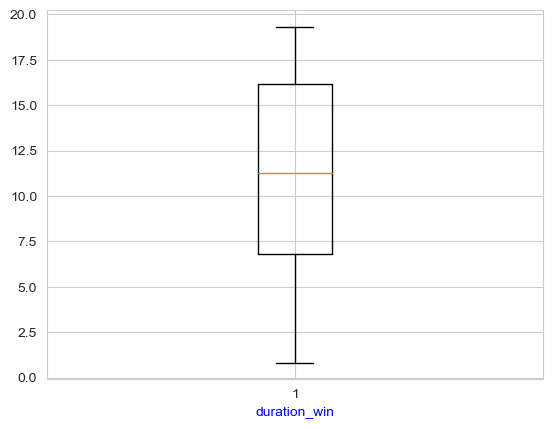

In [25]:
plt.boxplot(duration_win)
plt.xlabel('duration_win',color='b')
plt.show()

In [26]:
df['duration_win']=duration_win

In [27]:
def iqr(df,var):
    q1=np.quantile(df[var], 0.25)
    q3=np.quantile(df[var],0.75)
    diff=q3-q1
    lower_v=q1-(1.5*diff)
    upper_v=q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [28]:
price_out = iqr(df, 'price')
price_out

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_win
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434,19.33
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562,19.33
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395,17.58
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129,6.50
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597,9.67
296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832,11.50
296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384,15.83
296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624,11.50


In [29]:
price_out.price.min()

99129

In [30]:
df[df['price']<99129].price.max()

98972

In [31]:
price_winsorize=stats.percentileofscore(df['price'], 98972)/100
print(price_winsorize)

0.9995902089934134


In [32]:
1-price_winsorize

0.0004097910065865573

In [33]:
price_win = winsorize(df.price, (0, (1-price_winsorize)))
price_win

masked_array(data=[ 5953,  5953,  5956, ..., 79099, 81585, 81585],
             mask=False,
       fill_value=999999,
            dtype=int64)

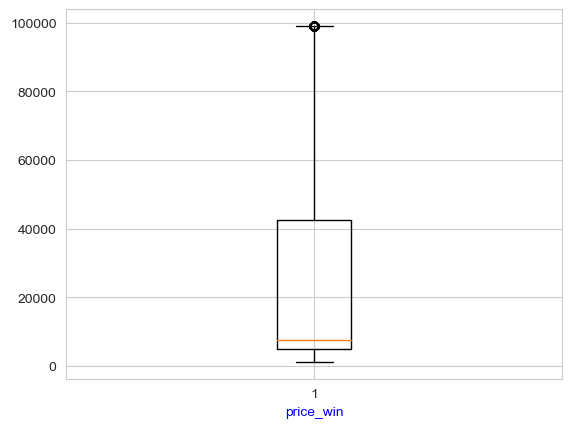

In [34]:
plt.boxplot(price_win)
plt.xlabel('price_win', color='b')
plt.show()

In [35]:
df['price_win']=price_win

In [36]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_win,price_win
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2.17,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2.25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2.33,5955


In [37]:
df.drop(['duration','price'], axis=1,inplace=True)


In [38]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_win,price_win
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,2.17,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,2.25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,2.33,5955


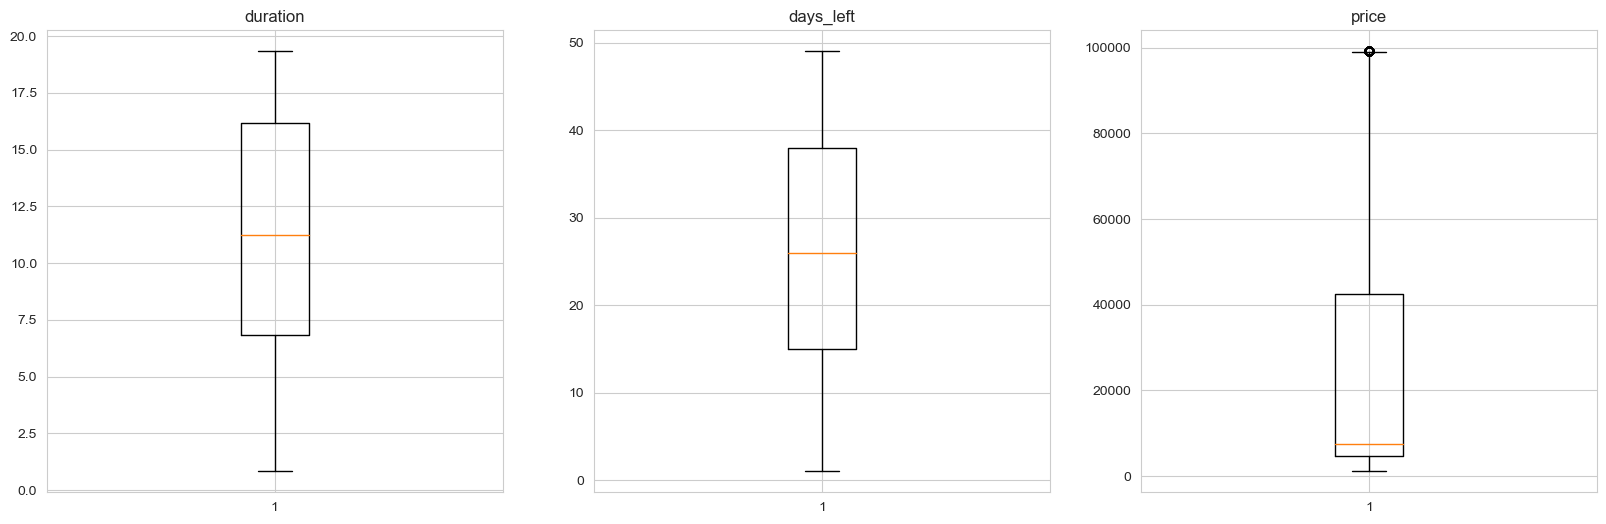

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))


ax1.boxplot(df['duration_win'])
ax1.set_title('duration')

ax2.boxplot(df['days_left'])
ax2.set_title('days_left')

ax3.boxplot(df['price_win'])
ax3.set_title('price')
plt.show()

Text(0.5, 1.0, 'price')

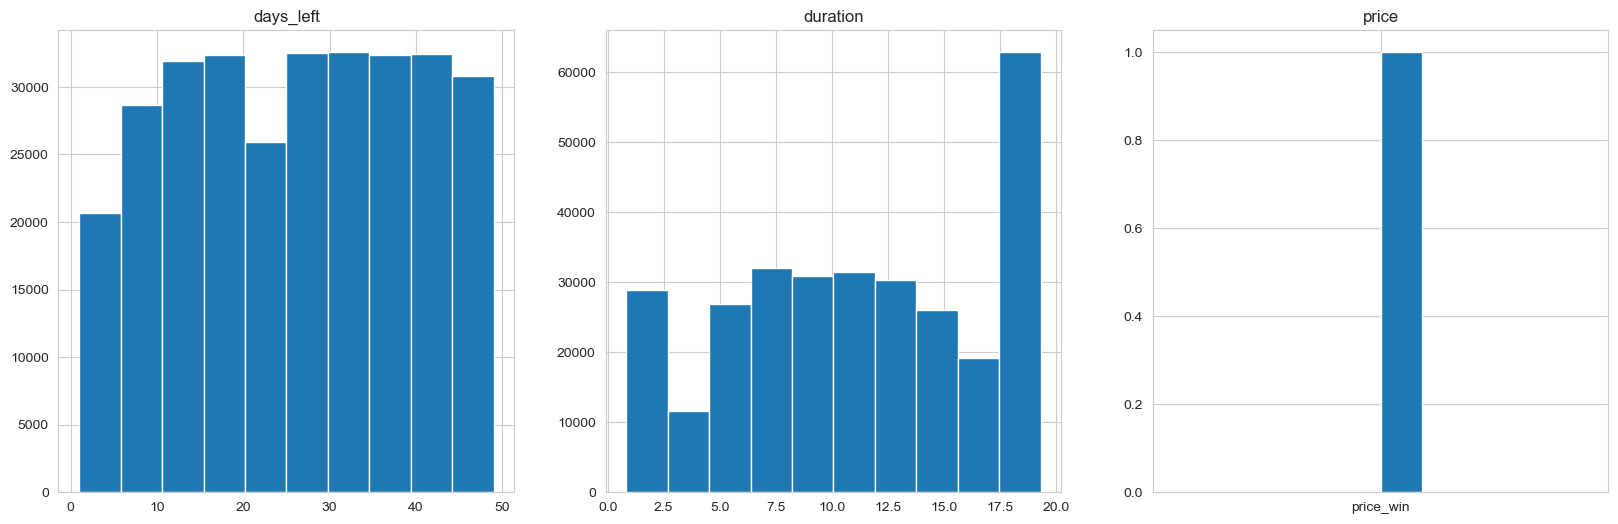

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))
ax1.hist(df['days_left'])
ax1.set_title('days_left')

ax2.hist(df['duration_win'])
ax2.set_title('duration')

ax3.hist(['price_win'])
ax3.set_title('price')

In [41]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_win,price_win
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,2.17,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,2.25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,2.33,5955


In [42]:
# checking for their unique values and value count to know my dataset

unique_number=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number,columns=['Unique Number'], index=df.columns)
    

,Unique Number
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
days_left,49
duration_win,226


In [43]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_win,price_win
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,2.17,5956


- class will be replace by 0 and 1 
- get dummies will be used for stop, airline, source_city, stops, departure_time, arrival_time,destination_city**

In [44]:
df_copy=df.copy()

In [45]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_win,price_win
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,2.17,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,2.33,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,2.17,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,2.25,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,2.33,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,49,10.08,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,49,10.42,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,13.83,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,10.00,81585


In [46]:
df_copy["class"] = df_copy["class"].replace({'Economy':1,'Business':0}).astype(int)

In [47]:
df_copy.drop('flight',axis=1,inplace=True)

In [48]:
df_copy.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_win,price_win
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,1,2.17,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,1,2.33,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,1,2.17,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,1,2.25,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,1,2.33,5955


In [49]:
df_category =['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']
df_copy = pd.get_dummies(df_copy, columns=df_category, drop_first=True).astype('int64')
df_copy.head()

,class,days_left,duration_win,price_win,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,1,2,5953,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,2,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,2,5956,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,2,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,2,5955,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [50]:
df_copy

,class,days_left,duration_win,price_win,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,1,2,5953,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,2,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,2,5956,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,2,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,2,5955,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,49,10,69265,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
300149,0,49,10,77105,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300150,0,49,13,79099,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300151,0,49,10,81585,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [51]:
df_copy

,class,days_left,duration_win,price_win,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,1,2,5953,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,2,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,2,5956,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,2,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,2,5955,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,49,10,69265,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
300149,0,49,10,77105,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300150,0,49,13,79099,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
300151,0,49,10,81585,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


## Scaling using MinMaxScaler

In [52]:
#creating cols to scale
col_to_scale = ['duration_win', 'days_left', 'price_win']

#call the scaler functions
scaler=MinMaxScaler(feature_range=(0,1))

#fit and transform the columns
df_copy[col_to_scale] = scaler.fit_transform(df_copy[col_to_scale])

df_copy.head()

,class,days_left,duration_win,price_win,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,0.0,0.105263,0.049457,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0.0,0.105263,0.049457,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0.0,0.105263,0.049488,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.0,0.105263,0.049478,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0.0,0.105263,0.049478,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [53]:
df_copy.shape

(300153, 31)

## Modelling

In [54]:
#make the data
X = df_copy.drop(['price_win'],axis=1)
y = df['price_win']

#splitting using the train_test_split ()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)


# Linear Regression Algorithm

In [55]:
#make a seed
np.random.seed(42)

#Instantiating Linear Regressor
lr_model = LinearRegression()
print("Model name = ", lr_model)
#fit model to data
lr_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", lr_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = lr_model.predict(X_test)

#Intercept of the model
print("Model Intercept =", lr_model.intercept_)

#Coefficient of the model
print("Model Coeff =", lr_model.coef_)

#Evaluation metrics
MAE_1 = mean_absolute_error(y_test, y_pred)
MSE_1 = mean_squared_error(y_test, y_pred)
RMSE_1 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_1 = r2_score(y_test, y_pred)
RMSLE_1 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_1)  
print('Mean Squared Error (MSE):', MSE_1)  
print('Root Mean Squared Error (RMSE):', RMSE_1)
print('R2_score:', R2_1)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_1)

Model name =  LinearRegression()
Model score = 0.9121180023548835
Model Intercept = 51998.010789652726
Model Coeff = [-4.49219012e+04 -6.25363772e+03  1.84182382e+03 -3.05567921e+01
  1.69013764e+03  2.22867988e+03  2.19932999e+03  3.95861014e+03
 -1.02987837e+02 -1.40289831e+03 -1.67862978e+03  1.55494221e+03
 -2.09705213e+02  7.70795904e+02  6.54688041e+02  1.49233783e+03
  8.64714195e+02  5.22026946e+02  2.06099866e+03 -7.14893162e+03
 -8.18249557e+02  9.33834506e+02  1.00846123e+03  3.92922864e+02
  1.14806875e+03 -2.61890051e+02 -1.54381822e+03 -1.74745803e+03
  1.34556150e+03 -2.92812738e+01]
Mean Absolute Error (MAE): 4543.3404537083115
Mean Squared Error (MSE): 45271573.03175748
Root Mean Squared Error (RMSE): 6728.415343285333
R2_score: 0.9121180023548835
Root Mean Squared Log Error (RMSLE): 8.81409493329154


## RandomForest Algorithm

In [76]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
random_model = RandomForestRegressor(n_jobs=-1)
print("Model name = ", random_model)
#fit model to data
random_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", random_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = random_model.predict(X_test)


#Evaluation metrics
MAE_2 = mean_absolute_error(y_test, y_pred)
MSE_2 = mean_squared_error(y_test, y_pred)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_2 = r2_score(y_test, y_pred)
RMSLE_2 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_2)  
print('Mean Squared Error (MSE):', MSE_2)  
print('Root Mean Squared Error (RMSE):', RMSE_2)
print('R2_score:', R2_2)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_2)

Model name =  RandomForestRegressor(n_jobs=-1)
Model score = 0.9735412969889436
Mean Absolute Error (MAE): 1622.01652107962
Mean Squared Error (MSE): 13629948.542222064
Root Mean Squared Error (RMSE): 3691.876019346
R2_score: 0.9735412969889436
Root Mean Squared Log Error (RMSLE): 8.213890014166692


## SVR Regressor

#Instantiating RandomForest Regressor
svr_model = SVR()
print("Model name = ", svr_model)

#fit model to data
svr_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", svr_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = svr_model.predict(X_test)

#evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2_score:', r2_score(y_test, y_pred))
print('Root Mean Squared Log Error (RMSLE):', np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

## XGBoost Regressor

In [57]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
xgb_model = XGBRegressor()
print("Model name = ", xgb_model)
#fit model to data
xgb_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", xgb_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = xgb_model.predict(X_test)


#Evaluation metrics
MAE_3 = mean_absolute_error(y_test, y_pred)
MSE_3 = mean_squared_error(y_test, y_pred)
RMSE_3 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_3 = r2_score(y_test, y_pred)
RMSLE_3 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_3)  
print('Mean Squared Error (MSE):', MSE_3)  
print('Root Mean Squared Error (RMSE):', RMSE_3)
print('R2_score:', R2_3)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_3)

Model name =  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Model score = 0.971690370435198
Mean Absolute Error (MAE): 2155.1855582964695
Mean Squared Error (MSE): 14583435.705687476
Root Mean Squared Error (RMSE): 3818.826482793828
R2_score: 0.971690370435198
Root Mean Squared Log Error (RMSLE): 8

## CatBoost Regressor

In [58]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
cat_model = CatBoostRegressor()
print("Model name = ", cat_model)
#fit model to data
cat_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", cat_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = cat_model.predict(X_test)


#Evaluation metrics
MAE_4 = mean_absolute_error(y_test, y_pred)
MSE_4 = mean_squared_error(y_test, y_pred)
RMSE_4 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_4 = r2_score(y_test, y_pred)
RMSLE_4 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_4)  
print('Mean Squared Error (MSE):', MSE_4)  
print('Root Mean Squared Error (RMSE):', RMSE_4)
print('R2_score:', R2_4)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_4)

Model name =  <catboost.core.CatBoostRegressor object at 0x000001D51EC60F90>
Learning rate set to 0.096352
0:	learn: 20650.0049717	total: 177ms	remaining: 2m 56s
1:	learn: 18828.5252154	total: 205ms	remaining: 1m 42s
2:	learn: 17188.0012540	total: 234ms	remaining: 1m 17s
3:	learn: 15720.4212448	total: 262ms	remaining: 1m 5s
4:	learn: 14410.8283986	total: 293ms	remaining: 58.2s
5:	learn: 13236.6616699	total: 322ms	remaining: 53.4s
6:	learn: 12198.8814441	total: 353ms	remaining: 50.1s
7:	learn: 11267.6513692	total: 386ms	remaining: 47.9s
8:	learn: 10448.5737327	total: 424ms	remaining: 46.7s
9:	learn: 9725.6814216	total: 453ms	remaining: 44.8s
10:	learn: 9093.7173261	total: 484ms	remaining: 43.5s
11:	learn: 8535.0978401	total: 512ms	remaining: 42.2s
12:	learn: 8049.8244086	total: 542ms	remaining: 41.2s
13:	learn: 7619.4369967	total: 571ms	remaining: 40.2s
14:	learn: 7251.0960015	total: 600ms	remaining: 39.4s
15:	learn: 6933.9263314	total: 634ms	remaining: 39s
16:	learn: 6659.6815632	total

## DecisionTree Regressor

In [59]:
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
decision_model = DecisionTreeRegressor()
print("Model name = ", decision_model)
#fit model to data
decision_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", decision_model.score(X_test, y_test))

#make a prediction with the test data
y_pred = decision_model.predict(X_test)

#Evaluation metrics
MAE_5 = mean_absolute_error(y_test, y_pred)
MSE_5 = mean_squared_error(y_test, y_pred)
RMSE_5 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_5 = r2_score(y_test, y_pred)
RMSLE_5 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_5)  
print('Mean Squared Error (MSE):', MSE_5)  
print('Root Mean Squared Error (RMSE):', RMSE_5)
print('R2_score:', R2_5)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_5)

Model name =  DecisionTreeRegressor()
Model score = 0.962546606185645
Mean Absolute Error (MAE): 1775.5101872572197
Mean Squared Error (MSE): 19293758.6626192
Root Mean Squared Error (RMSE): 4392.466125380957
R2_score: 0.962546606185645
Root Mean Squared Log Error (RMSLE): 8.387646108109138


In [120]:
models = ["Linear Regression", "Random Forest Regressor","XGBRegressor", "CatBoostRegressor", "Decision Tree Regressor"]

MAE = [MAE_1, MAE_2, MAE_3, MAE_4, MAE_5]
MSE = [MSE_1, MSE_2, MSE_3,MSE_4, MSE_5]
RMSE = [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5]
R2 = [R2_1, R2_2, R2_3, R2_4, R2_5]
RMSLE = [RMSLE_1, RMSLE_2, RMSLE_3, RMSLE_4, RMSLE_5]

# Creating a dataframe
df1= pd.DataFrame({
    'Model': models,
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE,
    'R-Squared': R2,
    'RMSLE': RMSLE})

In [121]:
df1.sort_values(by="R-Squared", ascending=False).reset_index(drop=True)

,Model,MAE,MSE,RMSE,R-Squared,RMSLE
0,Random Forest Regressor,1604.696684,1.097874e+07,3313.417497,0.978688,8.105735
1,XGBRegressor,2155.185558,1.458344e+07,3818.826483,0.971690,8.247698
2,CatBoostRegressor,2146.925158,1.460651e+07,3821.846091,0.971646,8.248489
3,Decision Tree Regressor,1775.510187,1.929376e+07,4392.466125,0.962547,8.387646
4,Linear Regression,4543.340454,4.527157e+07,6728.415343,0.912118,8.814095


- From the table above, **RandomForestRegressor** have a higher **r2** of **0.973541**, and a low **RMSE score of 3691.88** which mkes it a better model to deploy for price prediction

## Hyperparameter with RandomizedSearchCV

In [95]:
%%time

#diff RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10), "max_depth": [None, 3, 5, 10], "min_samples_split": np.arange(2, 20, 2),
              "min_samples_leaf": np.arange(1, 20, 2), "max_features": [0.5, 1], "max_samples": [100000]}

#instantiate RandomizedSearchCv model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid,
                                            n_iter=50, cv=5, verbose=2)

#Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, max_features=1, max_samples=100000, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   2.1s
[CV] END max_depth=None, max_features=1, max_samples=100000, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   2.0s
[CV] END max_depth=None, max_features=1, max_samples=100000, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   2.0s
[CV] END max_depth=None, max_features=1, max_samples=100000, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   1.9s
[CV] END max_depth=None, max_features=1, max_samples=100000, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   1.9s
[CV] END max_depth=3, max_features=1, max_samples=100000, min_samples_leaf=3, min_samples_split=12, n_estimators=10; total time=   0.4s
[CV] END max_depth=3, max_features=1, max_samples=100000, min_samples_leaf=3, min_samples_split=12, n_estim

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=2)

In [96]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 100000,
 'max_features': 0.5,
 'max_depth': None}

In [123]:
%time
#make a seed
np.random.seed(42)

#Instantiating RandomForest Regressor
random_model = RandomForestRegressor(n_estimators=80, min_samples_split=8, min_samples_leaf=1, 
                                                     max_depth=None, max_features=0.5, max_samples=100000, 
                                                     criterion='squared_error', n_jobs=-1)
print("Model name = ", random_model)
#fit model to data
random_model.fit(X_train, y_train)

#evaluate the linear regressor
print("Model score =", random_model.score(X_test, y_test))

#make a prediction with the test data
new_y_pred = random_model.predict(X_test)


#Evaluation metrics
MAE_2 = mean_absolute_error(y_test, y_pred)
MSE_2 = mean_squared_error(y_test, y_pred)
RMSE_2 = np.sqrt(mean_squared_error(y_test, y_pred))
R2_2 = r2_score(y_test, y_pred)
RMSLE_2 =  np.log(np.sqrt(mean_squared_error(y_test, y_pred)))

print('Mean Absolute Error (MAE):', MAE_2)  
print('Mean Squared Error (MSE):', MSE_2)  
print('Root Mean Squared Error (RMSE):', RMSE_2)
print('R2_score:', R2_2)
print('Root Mean Squared Log Error (RMSLE):', RMSLE_2)

CPU times: total: 0 ns
Wall time: 0 ns
Model name =  RandomForestRegressor(max_features=0.5, max_samples=100000, min_samples_split=8,
                      n_estimators=80, n_jobs=-1)
Model score = 0.9786878797552946
Mean Absolute Error (MAE): 1604.6966837997372
Mean Squared Error (MSE): 10978735.508675503
Root Mean Squared Error (RMSE): 3313.4174968867874
R2_score: 0.9786878797552946
Root Mean Squared Log Error (RMSLE): 8.105735412134784


- This is nice, our models performed better than the previous model established. I achieved a higher **r2 score** and a lower **RMSE score** after tunning our model using **RandomizedSearchCV**

## Comparing the actual price to the predicted price

In [128]:
preds=pd.DataFrame({'Actual_price':y_test,'Predicted_price':new_y_pred.astype(int)})
new_df=df.merge(preds,left_index=True,right_index=True)
new_df.sample(20,random_state=42)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_win,price_win,Actual_price,Predicted_price
113254,Air_India,AI-503,Bangalore,Evening,one,Evening,Hyderabad,Economy,31,19.33,9670,9670,7270
265524,Air_India,AI-765,Kolkata,Night,one,Evening,Mumbai,Business,24,19.33,43711,43711,50350
240161,Vistara,UK-988,Mumbai,Night,one,Evening,Hyderabad,Business,31,19.33,66077,66077,59520
228067,Air_India,AI-607,Mumbai,Evening,one,Morning,Delhi,Business,31,16.17,53152,53152,51799
17214,Air_India,AI-441,Delhi,Evening,one,Morning,Bangalore,Economy,36,17.33,4230,4230,4972
80444,Air_India,AI-679,Mumbai,Morning,one,Evening,Chennai,Economy,24,5.83,4757,4757,5329
114131,Air_India,AI-738,Bangalore,Morning,two_or_more,Night,Hyderabad,Economy,38,19.33,8526,8526,7572
275606,Vistara,UK-878,Hyderabad,Afternoon,one,Night,Delhi,Business,18,10.08,51875,51875,54777
255630,Air_India,AI-804,Bangalore,Early_Morning,one,Evening,Kolkata,Business,44,13.00,60508,60508,60132
56931,Vistara,UK-651,Mumbai,Evening,two_or_more,Night,Bangalore,Economy,24,19.33,10809,10809,10855


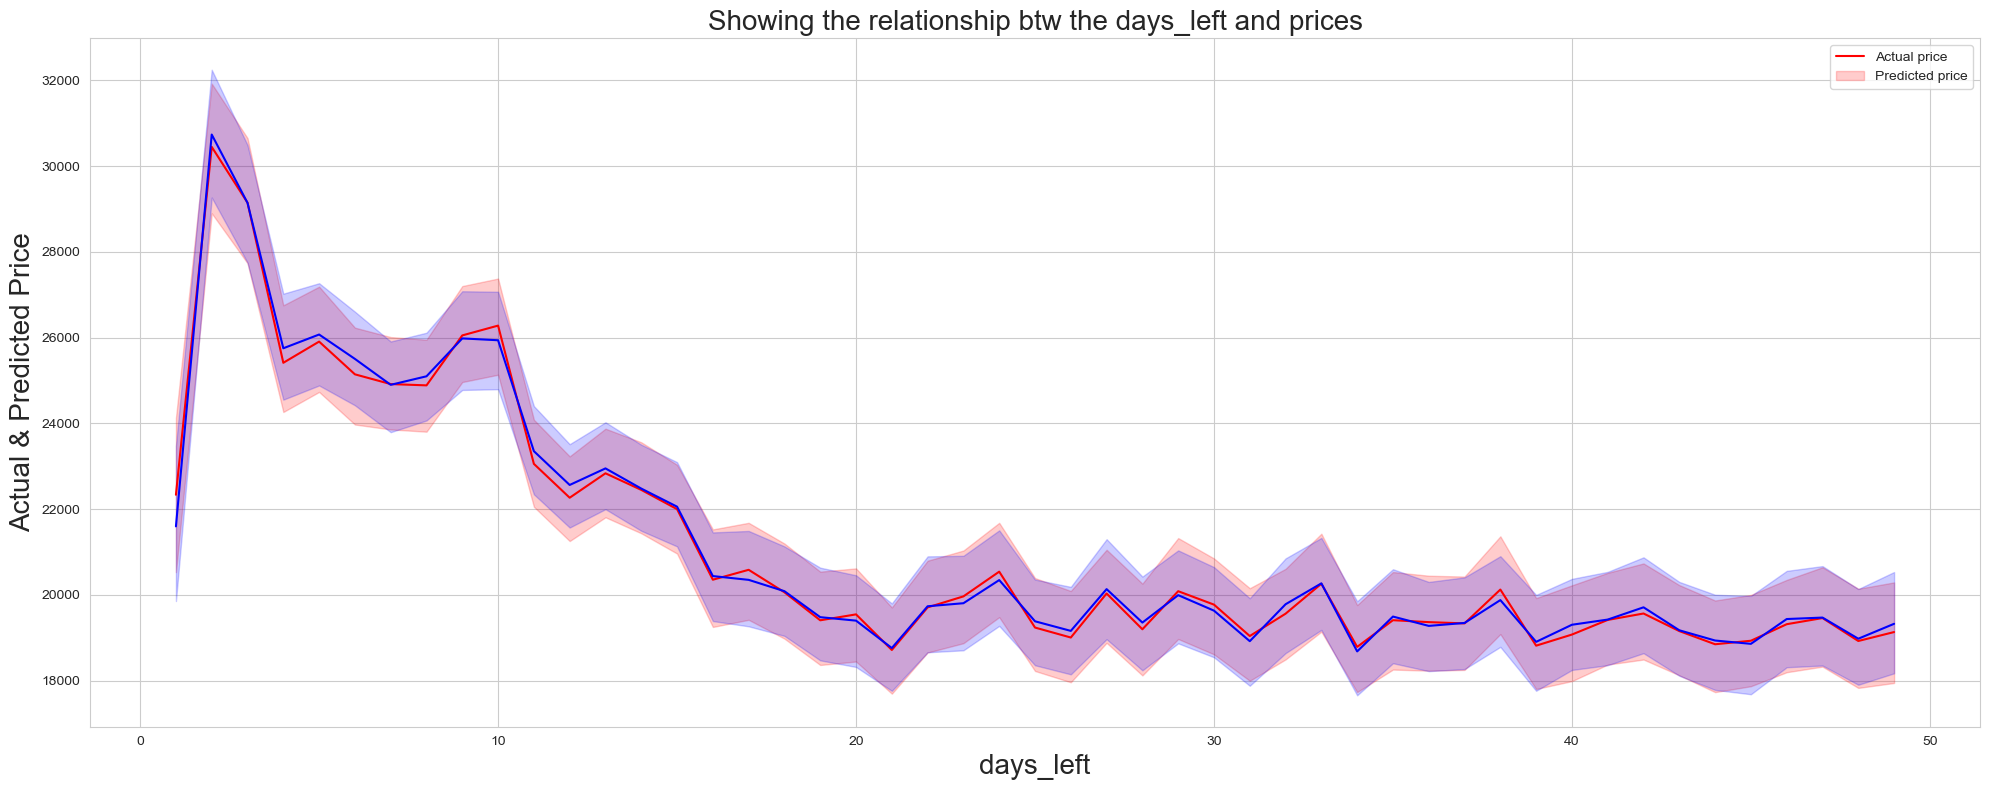

In [135]:
plt.figure(figsize=(20,8))
sns.lineplot(data=new_df,x='days_left',y='Actual_price',color='red')
sns.lineplot(data=new_df,x='days_left',y='Predicted_price',color='blue')
plt.title('Showing the relationship btw the days_left and prices',fontsize=20)
plt.legend(labels=['Actual price','Predicted price'],fontsize=10)
plt.xlabel('days_left',fontsize=20)
plt.ylabel('Actual & Predicted Price',fontsize=20)
plt.tight_layout()
plt.show()

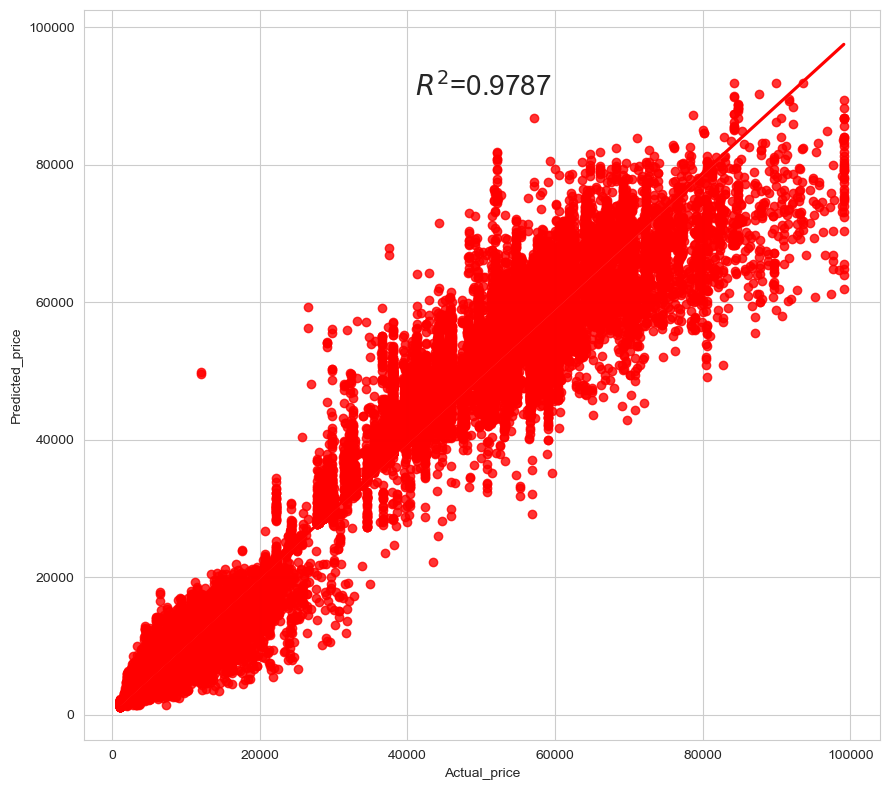

In [141]:
plt.figure(figsize=(9,8))
sns.regplot(new_df,x= 'Actual_price', y='Predicted_price', color='r')
plt.text(x= 41000, y=90000,s='$ R^{2} $=' + str(round(R2_2, 4)),fontsize=20)
plt.tight_layout()
plt.show()

## Result Submission

In [147]:
result_submission={'Actual': y_test, 'Pred': new_y_pred.astype(int)}
model = pd.DataFrame(result_submission)
model.sample(10, random_state=42, replace=True)

,Actual,Pred
155155,5892,6053
102710,6568,6517
297152,54896,55240
127252,5093,5056
127947,11675,13266
196377,6437,6489
130074,6363,6505
192060,3000,3000
41071,2974,2324
258509,37985,38015


In [152]:
model.shape

(75039, 2)

In [149]:
model.to_csv('submission_csv', index=False)

In [150]:
pd.read_csv('submission_csv').shape

(75039, 2)